# Subjective Verbs

In the previous notebook we looked at large-scale trends in the use of subjects and verbs in the two subcorpora. In this notebook, we turn to understanding possible relationships between the subjects and the verbs that follow them. That is, what kinds of actions are available to the subjects *she* and *he*. How do those actions compare between male speakers and female speakers. Finally, is there a continuity between the actions projected onto a gendered subject and the speaking subject (her or himself) as reflected in the verbs paired with *I*?

<div class="alert alert-block alert-info"> 
    <p>A note about the naming of variables below:</p>
    <ul>
        <li><code>m</code> and <code>w</code> represent the subcorpus, men or women speakers</li>
        <li><code>pp</code> stands for personal pronouns, usually "he," "she," and "I" here.
        <li><code>svo</code> signifies that the complete SVO-triplet is used</li>
        <li><code>sv</code> signifies that just the subject-verb pairs are being used</li>
    </ul>   
</div>

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns

# LOAD DATAFRAMES
# the `lem` suffix indicates the verbs have been lemmatized
svos_m = pd.read_csv("../output/svos_m_lem.csv", index_col=0)
svos_w = pd.read_csv("../output/svos_w_lem.csv", index_col=0)

# Save the SVO count for each corpus for calculating relative frequencies
m_svo_count = svos_m.shape[0]
w_svo_count = svos_w.shape[0]

# Output something to check our efforts
print(m_svo_count, w_svo_count)

80460 26610


## Possible Approaches

What we want to explore is both the usual ways that speakers (men or women) pair the pronouns *he*, *she*, *i* with verbs and also, perhaps, the significant pairings.

The usual way can be approached via **counts** (see below), which can be readily visualized with Sankey plots. (Those plots are now in a separate notebook.) 

Relative frequencies would let us compare across the two subcorpora ... or would this be approached better by some form of TF-IDF? (And would we need to determine some sort of lower threshold of the number of sentences in which a verb must occur? We're not interested in verb only used in a single sentence but verbs used often in a pairing in one subcorpus and not in the other.)

### Early Efforts

Elsewhere we have used the following code to give us a verb count associated with a particular subject. 

```python
# If the top N verbs associated with "he" is wanted
# iloc can be commented out if not desired

N = 20
m_he = svos_m[svos_m["subject"] == "he"].groupby(["verb"]).size().reset_index(
    name='obs').sort_values(['obs'], ascending=False).iloc[:N] 

# Get a sense of our results
print(m_he.shape)
print(m_he.head())
```

### Subsets

This gives us all the subjects and verb pairings. 

Used on the entire mens subcorpus, it suggests that **the most common subject-verb pairing is *we have***, by a pretty large margin, so let's mark that as something worth exploring further.

A hand inspection also suggests that pronouns and generic collective nouns like "people" or "everyone" dominate as subjects of sentences.

In [2]:
# Subset
m_svpairs = svos_m.value_counts(subset=['subject', 'verb'])
print(m_svpairs.shape)
print(m_svpairs.head(10))

(19993,)
subject  verb
we       have    2259
you      have    1505
i        have    1318
         want    1210
         go      1076
you      see      997
we       do       972
you      get      901
we       go       743
         need     717
dtype: int64


In [3]:
w_svpairs = svos_w.value_counts(subset=['subject', 'verb'])
print(w_svpairs.shape)
print(w_svpairs.head(10))

(8809,)
subject  verb
we       have    674
i        have    586
         want    424
you      have    406
i        go      330
we       need    255
you      see     255
we       do      246
they     have    231
i        do      226
dtype: int64


In [4]:
# Save our results for hand inspection
# m_svpairs.to_csv("../output/m_svpairs.csv")
# w_svpairs.to_csv("../output/w_svpairs.csv")

<div class="alert alert-block alert-info"> 
    <p>All three parts of the SVO can be subsetted:</p>
    <pre>m_svos = svos_m.value_counts(subset=['subject', 'verb', 'object'])
    
 subject  verb  object
 we       do    [what]    206
                [that]    162
 i        tell  [you]     159
 you      do    [what]    151
          see   [what]    130</pre>
    </div>

### Filtered

One approach might look like this, where we simply, in effect, filter the dataframe only for the subjects, here the pronouns *he*, *she*, and *i*, in which we are interested.

As the `shape` method reveals, this yields 18836 SVOs out of 80460 total for men, or almost one-quarter (23.4%) of all the sentences used by male speakers use one of those three pronouns. For women, there are 7585 SVOs that have he, she, i as subjects out of 26610, which is a bit more than a quarter (28.5%). 

#### Complete Subject-Verb-Object Triplet

In [5]:
# Filter
m_pp_svo = svos_m.loc[(
    svos_m['subject'] == 'he') | (
    svos_m['subject'] == 'she') | (
    svos_m["subject"] == "i")
]
print(m_pp_svo.shape)
print(m_pp_svo.head())

(18836, 3)
  subject  verb                                             object
0       i  blow                                       [conference]
1       i  want  [to, thank, all, of, you, for, the, many, nice...
2       i  need                                             [that]
4       i   fly                                              [two]
5       i  have  [to, take, off, my, shoes, or, boots, to, get,...


In [6]:
# And now the women subcorpus
w_pp_svo = svos_w.loc[(
    svos_w['subject'] == 'he') | (
    svos_w['subject'] == 'she') | (
    svos_w["subject"] == "i")
]
print(w_pp_svo.shape)
print(w_pp_svo.head())

(7585, 3)
  subject     verb                                             object
1     she     turn  [to, be, a, much, bigger, dog, than, i, 'd, an...
5       i  contact                                [parks, department]
6       i  mention                                             [that]
7     she     pull                                               [me]
8     she       be  [dragging, me, ,, and, lo, and, behold, ,, at,...


#### Just the Subject-Verb Pairs

A survey of the SVOs above reveals that there are verbs that frequently appear, those that regularly appear, and those that rarely appear with the three pronouns in which we are interested. We use `value_counts()` combined with `isin()` to get a summary of the three pronouns and verbs.

The results reveal that the 18836 SVOs in the mens subcorpus use only 1723 verbs and the 7585 SVOs in the womens subcorpus use 1069 verbs. Disregarding for the moment how many verbs may only have been used once, it would appear that there is greater variety in women's discourse, but that could also represent the power law dynamic: that as the number of utterances increases, the total vocabulary growth flattens greatly.

In [9]:
# Create a list of the pronouns we want to see
pronouns = ["he", "she", "i"]

# And then count the number of times 
# those pronouns are paired with particular verbs
m_pp_sv = svos_m[svos_m["subject"].isin(
    pronouns)].value_counts(
    subset=['subject', 'verb']).reset_index()

# Re-label the new column from "0" to something human-readable
m_pp_sv.rename(columns={0:'v_count'}, inplace=True)

# Add a column with relative frequency
m_pp_sv['v_freq'] = m_pp_sv['v_count'] / m_svo_count

print(m_pp_sv.shape)
print(m_pp_sv.head())

(1723, 4)
  subject  verb  v_count    v_freq
0       i  have     1318  0.016381
1       i  want     1210  0.015039
2       i    go     1076  0.013373
3       i    do      650  0.008079
4       i   get      586  0.007283


In [10]:
# Repeat for women's subcorpus
w_pp_sv = svos_w[svos_w["subject"].isin(
    pronouns)].value_counts(
    subset=['subject', 'verb']).reset_index()

w_pp_sv.rename(columns={0:'v_count'}, inplace=True)
w_pp_sv['v_freq'] = w_pp_sv['v_count'] / w_svo_count

print(w_pp_sv.shape)
print(w_pp_sv.head())

(1069, 4)
  subject  verb  v_count    v_freq
0       i  have      586  0.022022
1       i  want      424  0.015934
2       i    go      330  0.012401
3       i    do      226  0.008493
4       i   get      203  0.007629


In [11]:
# m_pp_sv.to_csv("../output/m_pp_sv.csv")
# w_pp_sv.to_csv("../output/w_pp_sv.csv")

## Character Spaces as Verb-Feature Spaces

The goal in this section is to:

1. Collect all the verbs associated with the specified subjects
2. Weight the verbs (by normalization)
3. Compare the verbs manually
4. Visualize a comparison using PCA or t-SNE

**Possible threshold**: 0.002 (0.2%) frequency represents at least 38 occurrences in the men's subcorpus and 15 in the women's.


In [12]:
# Filter for pronoun and drop the un-needed columns
m_he = m_pp_sv.loc[(m_pp_sv['subject'] == 'he')].drop(columns=["subject","v_count"])
w_he = w_pp_sv.loc[(w_pp_sv['subject'] == 'he')].drop(columns=["subject","v_count"])

In [13]:
comp_he = m_he.merge(
    w_he, 
    left_on = "verb", right_on = "verb", 
    suffixes=("_m", "_w"))

print(comp_he.shape)
print(comp_he.head())

(159, 3)
   verb  v_freq_m  v_freq_w
0  have  0.002883  0.003006
1   say  0.001641  0.001466
2    do  0.001380  0.001090
3   get  0.001119  0.000714
4    go  0.000969  0.001203


<AxesSubplot:xlabel='v_freq_m', ylabel='v_freq_w'>

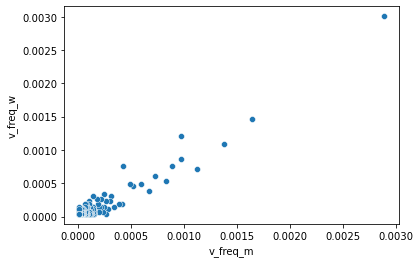

In [14]:
sns.scatterplot(data = comp_he, x = "v_freq_m", y = "v_freq_w")